In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from scipy.spatial import procrustes
from scipy.spatial.distance import jensenshannon


plt.style.use('ggplot')

data=pd.read_csv('combined_data_with_loc.csv')
#load feature category mapping
feature_category_dict=json.load(open('feature_category_dict.json'))
data.head()

,Community Name,Region,Map reference,Grid reference,Location,Population Density,Travel time to GPO (minutes),Distance to GPO (km),LGA,Primary Care Partnership,...,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %",geo_lat,geo_lon,cart_x,cart_y
0,Ascot Vale,Northern and Western Metropolitan,4,B3,6km NW of Melbourne,3758.623596,9.360142,6.958742,Moonee Valley (C),Inner North West Primary Care Partnership,...,6.630953,4.993841,679.257076,20.502456,1864.918123,56.290032,-37.775606,144.914871,-4.242641,4.242641e+00
1,Braybrook,Northern and Western Metropolitan,4,A3,10km WNW of Melbourne,2025.468296,15.131666,11.595888,Maribyrnong (C),"HealthWest (b): Hobson's Bay, Maribyrnong, Wyn...",...,12.824977,10.161988,543.631989,20.647263,1683.966712,63.957428,-37.779315,144.858155,-9.238795,3.826834e+00
2,Craigieburn,Northern and Western Metropolitan,2,A3,27km N of Melbourne,1034.970870,31.994666,43.100287,Hume (C),Hume-Whittlesea Primary Care Partnership,...,11.570855,15.213189,2044.424399,20.618005,5102.134434,51.454988,-37.570576,144.963028,0.000000,2.700000e+01
3,Croydon,Eastern Metropolitan,2,B4,28km E of Melbourne,1730.064830,28.992647,34.071323,Maroondah (C),Outer East Primary Care Partnership,...,5.093285,3.601752,1754.954941,28.537825,3062.182462,49.795026,-37.813411,145.281013,28.000000,1.714506e-15
4,Fawkner,Northern and Western Metropolitan,4,C1,12km N of Melbourne,2619.120089,17.405267,13.047142,Moreland (C),Inner North West Primary Care Partnership,...,11.510757,12.004044,680.401318,17.909865,1942.874353,51.141315,-37.705724,144.963028,0.000000,1.200000e+01


In [3]:
# Define the feature for population change from 2007 to 2012
feat = '2007-2012 population change'

# Extract the relevant population data based on the feature
pop_data = data[feature_category_dict[feat]]

rows_with_nan = pop_data.isnull().any(axis=1)

print('Number of rows with NaN values:', rows_with_nan.sum())

# print the rows with NaN values
print('Community Names with NaN values:')
print(data['Community Name'][rows_with_nan])

# print % of columns with NaN values for these rows
print('Percentage of columns with NaN values for these rows:')

for i in range(0, len(rows_with_nan)):
	if rows_with_nan[i]:
		print(pop_data.iloc[i].isnull().mean()*100)

pop_data


Number of rows with NaN values: 2
Community Names with NaN values:
9     Melbourne Airport
32            Waterways
Name: Community Name, dtype: object
Percentage of columns with NaN values for these rows:
100.0
7.6923076923076925


,"% change, 2007-2012, age 0-4","% change, 2007-2012, age 5-9","% change, 2007-2012, age 10-14","% change, 2007-2012, age 15-19","% change, 2007-2012, age 20-24","% change, 2007-2012, age 25-44","% change, 2007-2012, age 45-64","% change, 2007-2012, age 65-69","% change, 2007-2012, age 70-74","% change, 2007-2012, age 75-79","% change, 2007-2012, age 80-84","% change, 2007-2012, age 85+","% change, 2007-2012, total"
0,33.868020,20.847738,1.346650,-16.466913,3.523070,13.747209,7.719929,5.986023,-0.585217,-6.659853,-5.549949,-4.476119,9.244192
1,27.504555,18.816069,-6.088560,11.359405,34.848486,31.213353,8.248045,-7.630521,-3.301885,-25.296441,-5.660376,19.780222,16.226617
2,77.317631,41.497033,24.064721,39.285716,67.326735,56.536561,57.160872,69.686829,69.516942,82.452291,94.176224,41.675077,54.184498
3,20.801246,9.901416,-3.693037,-0.055117,-1.301474,16.744030,1.112552,15.385821,17.810815,-6.138242,14.690641,21.803187,8.430729
4,3.711793,5.491993,7.947022,8.786613,6.105008,13.746961,5.382677,-18.646863,-24.274405,-10.069928,19.287214,84.959353,6.112043
5,27.286357,-0.534759,-21.122600,1.476015,11.470654,30.677823,17.279688,-9.337861,0.645161,-21.349557,11.790393,11.885246,17.024151
6,16.838769,-3.013657,-2.598619,4.843538,22.400436,22.661686,6.740723,-5.221204,-16.244249,-17.390439,-2.664067,10.936670,8.697965
7,-13.182811,2.279635,6.421233,0.468750,19.883041,-3.692810,6.112369,21.720116,-0.172711,-14.130435,-15.094339,-5.182342,1.662502
8,-6.158874,19.563008,18.114065,-12.393533,-5.309940,6.967169,9.913202,27.855926,5.553444,20.338843,-4.015333,36.295087,7.366690
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# drop rows with NaN values
pop_data = pop_data.dropna()

pop_data

,"% change, 2007-2012, age 0-4","% change, 2007-2012, age 5-9","% change, 2007-2012, age 10-14","% change, 2007-2012, age 15-19","% change, 2007-2012, age 20-24","% change, 2007-2012, age 25-44","% change, 2007-2012, age 45-64","% change, 2007-2012, age 65-69","% change, 2007-2012, age 70-74","% change, 2007-2012, age 75-79","% change, 2007-2012, age 80-84","% change, 2007-2012, age 85+","% change, 2007-2012, total"
0,33.868020,20.847738,1.346650,-16.466913,3.523070,13.747209,7.719929,5.986023,-0.585217,-6.659853,-5.549949,-4.476119,9.244192
1,27.504555,18.816069,-6.088560,11.359405,34.848486,31.213353,8.248045,-7.630521,-3.301885,-25.296441,-5.660376,19.780222,16.226617
2,77.317631,41.497033,24.064721,39.285716,67.326735,56.536561,57.160872,69.686829,69.516942,82.452291,94.176224,41.675077,54.184498
3,20.801246,9.901416,-3.693037,-0.055117,-1.301474,16.744030,1.112552,15.385821,17.810815,-6.138242,14.690641,21.803187,8.430729
4,3.711793,5.491993,7.947022,8.786613,6.105008,13.746961,5.382677,-18.646863,-24.274405,-10.069928,19.287214,84.959353,6.112043
5,27.286357,-0.534759,-21.122600,1.476015,11.470654,30.677823,17.279688,-9.337861,0.645161,-21.349557,11.790393,11.885246,17.024151
6,16.838769,-3.013657,-2.598619,4.843538,22.400436,22.661686,6.740723,-5.221204,-16.244249,-17.390439,-2.664067,10.936670,8.697965
7,-13.182811,2.279635,6.421233,0.468750,19.883041,-3.692810,6.112369,21.720116,-0.172711,-14.130435,-15.094339,-5.182342,1.662502
8,-6.158874,19.563008,18.114065,-12.393533,-5.309940,6.967169,9.913202,27.855926,5.553444,20.338843,-4.015333,36.295087,7.366690
10,16.297424,43.088103,1.351843,8.730422,24.215149,13.066747,8.778438,32.205880,15.443519,-1.992583,4.404214,3.173833,13.032855


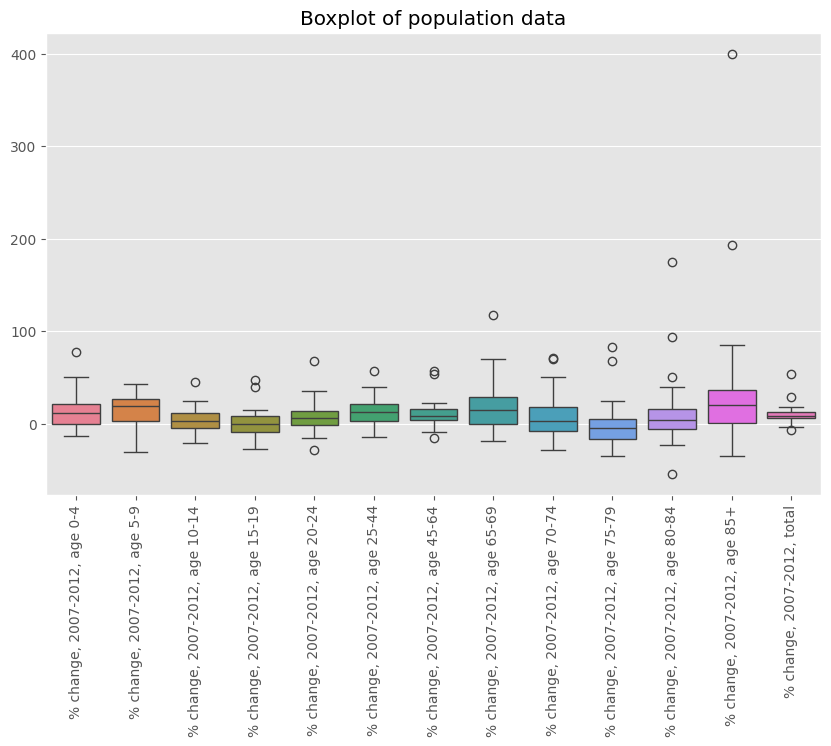

In [5]:
# do a boxplot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=pop_data)
plt.xticks(rotation=90)
plt.title('Boxplot of population data')
plt.show()

In [6]:
# drop rows with extreme outliers (more than 3 standard deviations from the mean) in any column
invalid_rows = []
# store mean and standard deviation for each column
mean_std = {}
for col in pop_data.columns:
	mean_std[col] = (pop_data[col].mean(), pop_data[col].std())


invalid_rows = []

for i in range(0, len(pop_data)):
	for col in pop_data.columns:
		if abs(pop_data[col].iloc[i] - mean_std[col][0]) > 3*mean_std[col][1]:
			invalid_rows.append(i)
			break



pop_data = pop_data.drop([pop_data.index[i] for i in set(invalid_rows)], axis=0)

pop_data

,"% change, 2007-2012, age 0-4","% change, 2007-2012, age 5-9","% change, 2007-2012, age 10-14","% change, 2007-2012, age 15-19","% change, 2007-2012, age 20-24","% change, 2007-2012, age 25-44","% change, 2007-2012, age 45-64","% change, 2007-2012, age 65-69","% change, 2007-2012, age 70-74","% change, 2007-2012, age 75-79","% change, 2007-2012, age 80-84","% change, 2007-2012, age 85+","% change, 2007-2012, total"
0,33.868020,20.847738,1.346650,-16.466913,3.523070,13.747209,7.719929,5.986023,-0.585217,-6.659853,-5.549949,-4.476119,9.244192
1,27.504555,18.816069,-6.088560,11.359405,34.848486,31.213353,8.248045,-7.630521,-3.301885,-25.296441,-5.660376,19.780222,16.226617
3,20.801246,9.901416,-3.693037,-0.055117,-1.301474,16.744030,1.112552,15.385821,17.810815,-6.138242,14.690641,21.803187,8.430729
4,3.711793,5.491993,7.947022,8.786613,6.105008,13.746961,5.382677,-18.646863,-24.274405,-10.069928,19.287214,84.959353,6.112043
5,27.286357,-0.534759,-21.122600,1.476015,11.470654,30.677823,17.279688,-9.337861,0.645161,-21.349557,11.790393,11.885246,17.024151
6,16.838769,-3.013657,-2.598619,4.843538,22.400436,22.661686,6.740723,-5.221204,-16.244249,-17.390439,-2.664067,10.936670,8.697965
7,-13.182811,2.279635,6.421233,0.468750,19.883041,-3.692810,6.112369,21.720116,-0.172711,-14.130435,-15.094339,-5.182342,1.662502
8,-6.158874,19.563008,18.114065,-12.393533,-5.309940,6.967169,9.913202,27.855926,5.553444,20.338843,-4.015333,36.295087,7.366690
10,16.297424,43.088103,1.351843,8.730422,24.215149,13.066747,8.778438,32.205880,15.443519,-1.992583,4.404214,3.173833,13.032855
11,4.249296,3.873243,-2.135227,-9.294868,7.871724,0.297269,9.448165,0.431038,-12.195119,-9.251097,8.247426,11.200004,2.118725


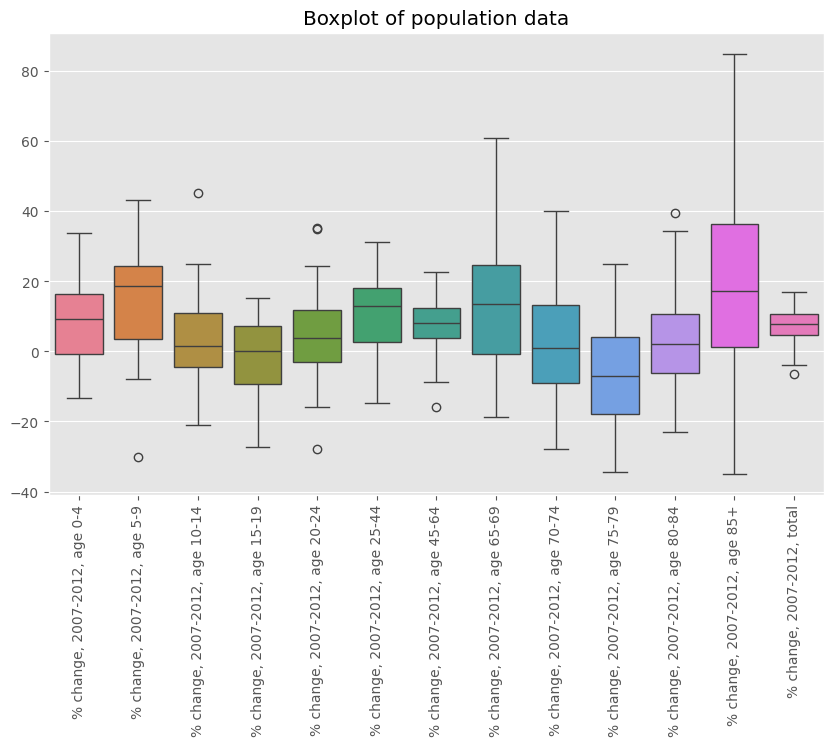

In [7]:
# do a boxplot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=pop_data)
plt.xticks(rotation=90)
plt.title('Boxplot of population data')
plt.show()

In [8]:
# print how many rows were removed
print('Number of rows remaining:', len(pop_data))

Number of rows remaining: 28


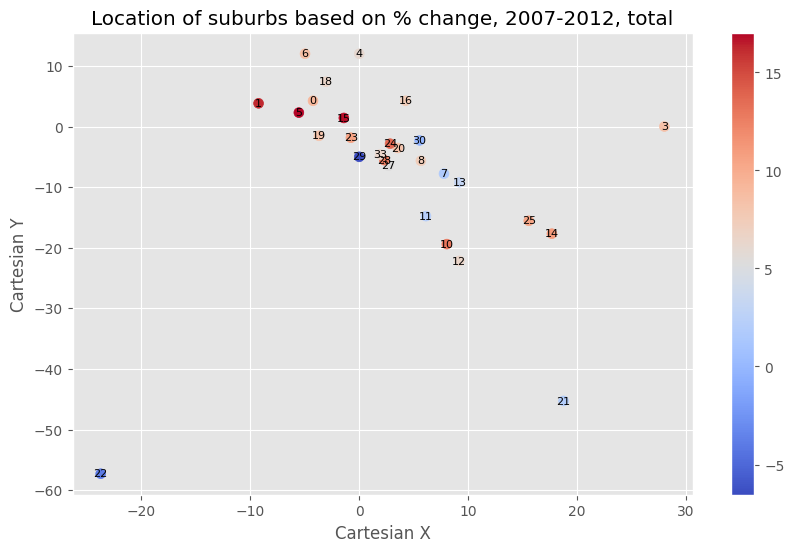

In [9]:
# do a heatmap of location of the suburbs (data['cart_x'] and data['cart_y']) and '% change, 2007-2012, total' to see if there are any patterns
common_index = pop_data.index.intersection(data.index)
data_subset=data.loc[common_index]
plt.figure(figsize=(10, 6))
suburb_subset_loc=data_subset[['cart_x','cart_y']]
plt.scatter(suburb_subset_loc['cart_x'],suburb_subset_loc['cart_y'],c=pop_data['% change, 2007-2012, total'],cmap='coolwarm',s=50)
plt.colorbar()
plt.xlabel('Cartesian X')
plt.ylabel('Cartesian Y')
plt.title('Location of suburbs based on % change, 2007-2012, total')
# annotate with index of the suburb
for i in suburb_subset_loc.index:
	plt.annotate(i, (suburb_subset_loc['cart_x'].loc[i], suburb_subset_loc['cart_y'].loc[i]), fontsize=8, ha='center', va='center')
plt.show()

Moran's I for '% change, 2007-2012, total': 0.0445
P-value: 0.1083
Significant clusters
       Community Name  LISA Cluster
0          Ascot Vale           1.0
1           Braybrook           1.0
4             Fawkner           2.0
6             Glenroy           1.0
18  Pascoe Vale South           2.0


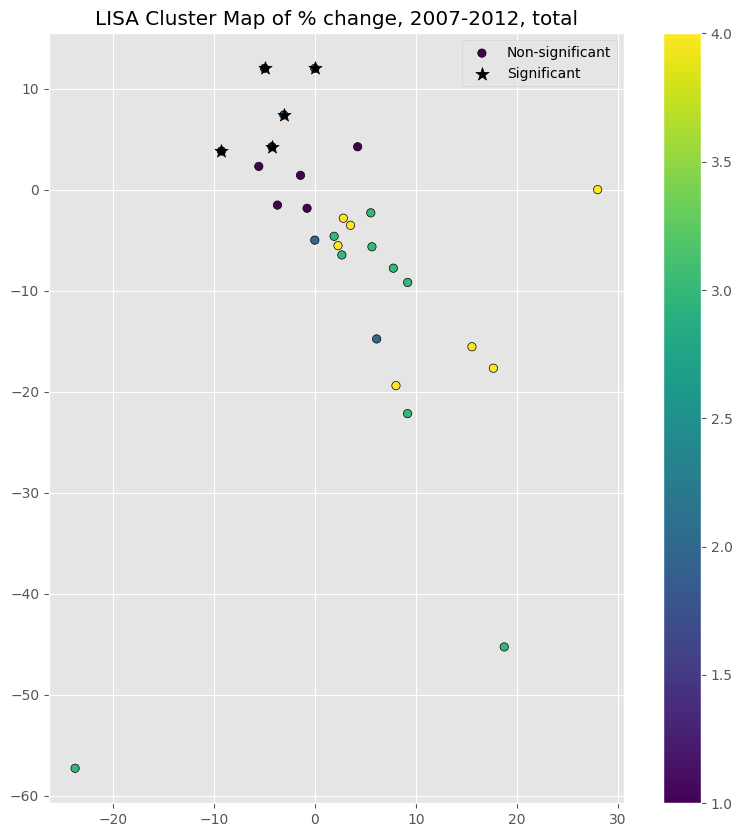

In [10]:
# do a LISA analysis to see if there are any spatial patterns
import numpy as np
import pandas as pd
import geopandas as gpd
from pysal.lib import weights
from esda import Moran, Moran_Local
import matplotlib.pyplot as plt

np.random.seed(42)

# Data is assumed to be loaded with columns 'cart_x' and 'cart_y'
# GeoDataFrame creation with geometry based on coordinates
gdf = gpd.GeoDataFrame(data_subset, geometry=gpd.points_from_xy(data_subset['cart_x'], data_subset['cart_y']))

# Create KNN weights with k=8 and row-standardize
w = weights.KNN.from_dataframe(gdf, k=8)
w.transform = 'R'  # Row-standardization

# Calculate global Moran's I
moran = Moran(pop_data['% change, 2007-2012, total'], w, permutations=9999)
print(f"Moran's I for '% change, 2007-2012, total': {moran.I:.4f}")
print(f"P-value: {moran.p_sim:.4f}")

# Calculate Local Moran's I (LISA)
lisa = Moran_Local(pop_data['% change, 2007-2012, total'], w)

# Plot LISA clusters
fig, ax = plt.subplots(figsize=(10, 10))
# gdf.plot(ax=ax, facecolor='lightgray', edgecolor='black')

# Identify significant clusters and plot them
significant = lisa.p_sim < 0.05
gdf.loc[significant, 'LISA Cluster'] = lisa.q[significant]  # Add cluster information to GeoDataFrame

# print the significant clusters
print('Significant clusters')
print(gdf.loc[significant, ['Community Name', 'LISA Cluster']])


# Plot significant clusters with colors for different cluster types
gdf.assign(cluster=lisa.q).plot(column='cluster', ax=ax, legend=True, cmap='viridis', edgecolor='black')
# highlight the significant suburbs
gdf.loc[significant].plot(ax=ax, marker='*', color='black', markersize=100)
plt.title("LISA Cluster Map of % change, 2007-2012, total")
plt.legend(['Non-significant', 'Significant'])
plt.show()




## Conclusion: No spatial autocorrelation found for overall % changes

In [15]:
# check the moran's I for all other features (individually)

# Create a dictionary to store the Moran's I values for each feature
moran_dict = {}
moran_p_dict = {}

feats=pop_data.columns

# Iterate through each feature
for feat in feats:
	moran = Moran(pop_data[feat], w, permutations=9999)
	moran_dict[feat] = moran.I
	moran_p_dict[feat] = moran.p_sim

# Create a DataFrame from the dictionary
moran_df = pd.DataFrame.from_dict(moran_dict, orient='index', columns=['Moran I'])
moran_df['P-value'] = moran_df.index.map(moran_p_dict)

# Sort the DataFrame by Moran's I values
moran_df = moran_df.sort_values(by='Moran I', ascending=False)

moran_df

,Moran I,P-value
"% change, 2007-2012, age 0-4",0.167180,0.0130
"% change, 2007-2012, age 45-64",0.085041,0.0513
"% change, 2007-2012, age 20-24",0.078579,0.0624
"% change, 2007-2012, total",0.044459,0.1103
"% change, 2007-2012, age 65-69",0.043733,0.1111
"% change, 2007-2012, age 15-19",0.040344,0.1223
"% change, 2007-2012, age 70-74",0.038503,0.1215
"% change, 2007-2012, age 25-44",0.006141,0.2094
"% change, 2007-2012, age 10-14",0.001436,0.2295
"% change, 2007-2012, age 85+",-0.003565,0.2564


In [16]:
# print the significant features with p-value < 0.05
print('Significantly spatially autocorrelated features:')
print(moran_df[moran_df['P-value'] < 0.05])


Significantly spatially autocorrelated features:
                               Moran I  P-value
% change, 2007-2012, age 0-4  0.167180   0.0130
% change, 2007-2012, age 5-9 -0.128626   0.0336


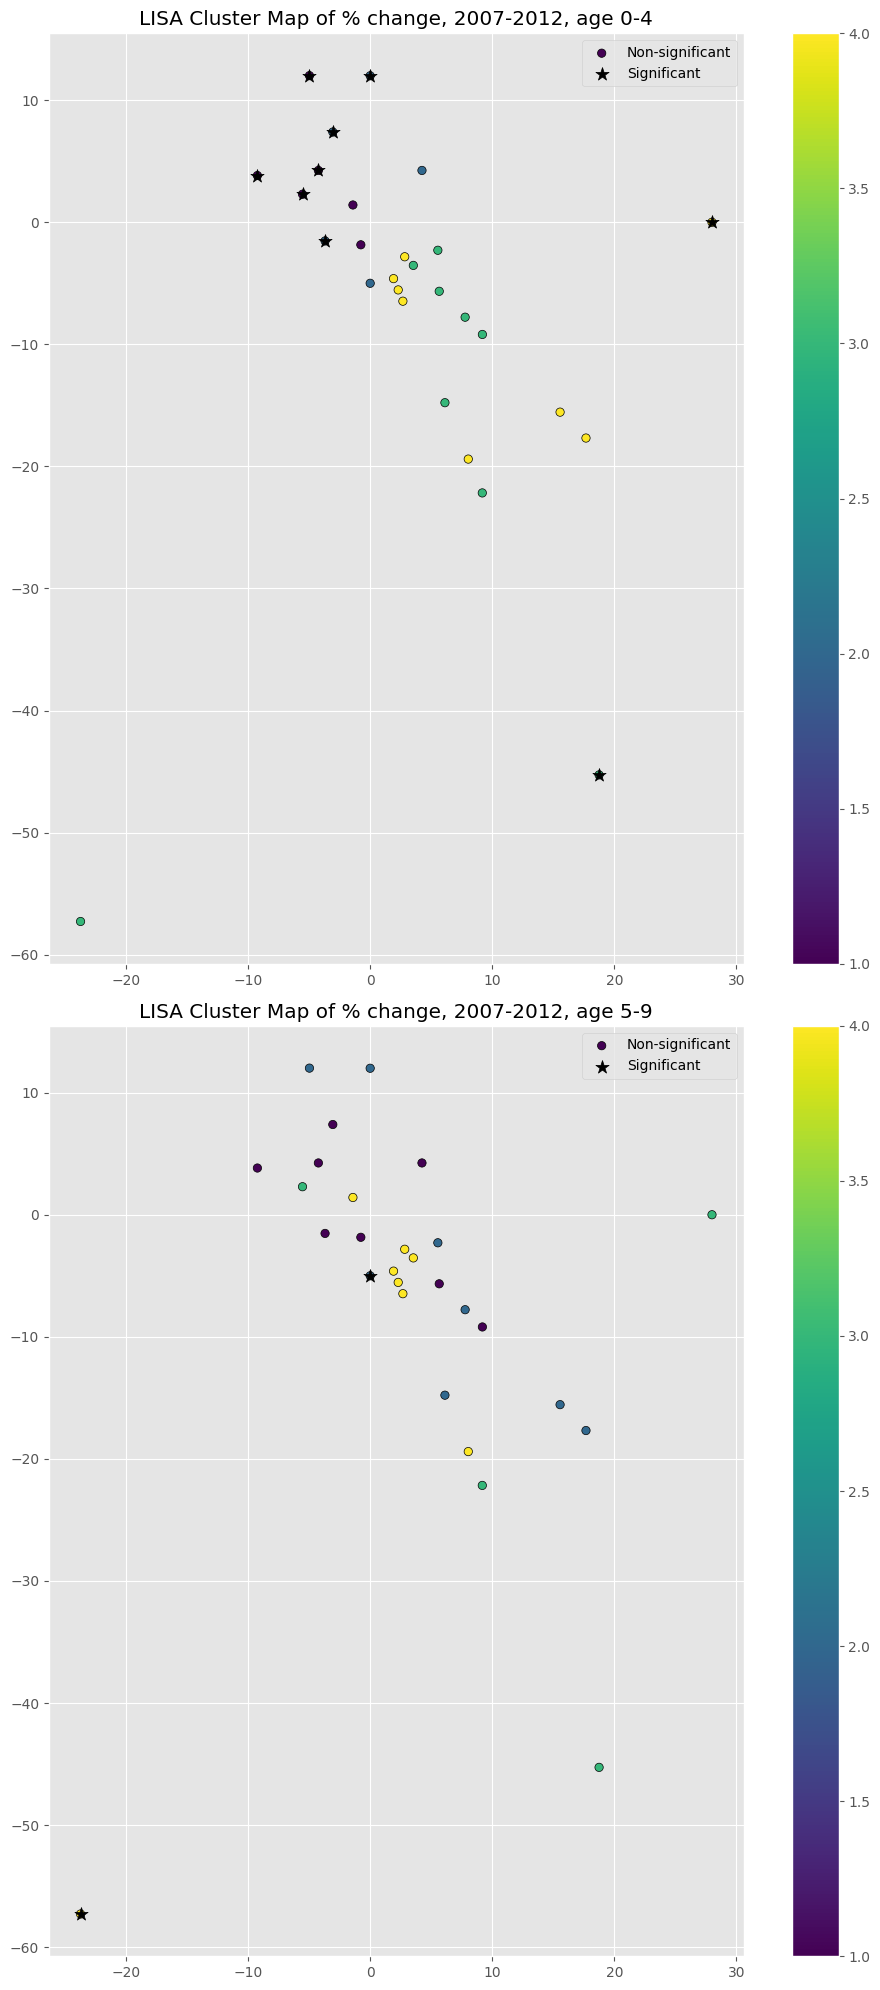

In [17]:
# do LISA analysis for the significant features
significant_feats = moran_df[moran_df['P-value'] < 0.05].index

# Create a dictionary to store the significant LISA clusters
lisa_dict = {}

# Iterate through each significant feature

for feat in significant_feats:
	# Calculate Local Moran's I (LISA)
	lisa = Moran_Local(pop_data[feat], w)
	# Store the LISA object in the dictionary
	lisa_dict[feat] = lisa

# Plot LISA clusters for significant features
fig, ax = plt.subplots(len(significant_feats), 1, figsize=(10, 10*len(significant_feats)))

for i, feat in enumerate(significant_feats):
	# Plot significant clusters
	significant = lisa_dict[feat].p_sim < 0.05
	gdf.loc[significant, 'LISA Cluster'] = lisa_dict[feat].q[significant]  # Add cluster information to GeoDataFrame

	# Plot significant clusters with colors for different cluster types
	gdf.assign(cluster=lisa_dict[feat].q).plot(column='cluster', ax=ax[i], legend=True, cmap='viridis', edgecolor='black')
	# highlight the significant suburbs
	gdf.loc[significant].plot(ax=ax[i], marker='*', color='black', markersize=100)
	ax[i].set_title(f"LISA Cluster Map of {feat}")
	ax[i].legend(['Non-significant', 'Significant'])

plt.tight_layout()
plt.show()

In [18]:
# print the significant clusters for each feature
for feat in significant_feats:
	significant = lisa_dict[feat].p_sim < 0.05
	print(f"Significant clusters for {feat}:")
	print(gdf.loc[significant, ['Community Name', 'LISA Cluster']])
	print('\n')
	

Significant clusters for % change, 2007-2012, age 0-4:
       Community Name  LISA Cluster
0          Ascot Vale           1.0
1           Braybrook           1.0
3             Croydon           4.0
4             Fawkner           2.0
5           Footscray           1.0
6             Glenroy           1.0
18  Pascoe Vale South           2.0
19     Port Melbourne           2.0
21         Somerville           3.0


Significant clusters for % change, 2007-2012, age 5-9:
   Community Name  LISA Cluster
22       Sorrento           4.0
29  St Kilda West           2.0




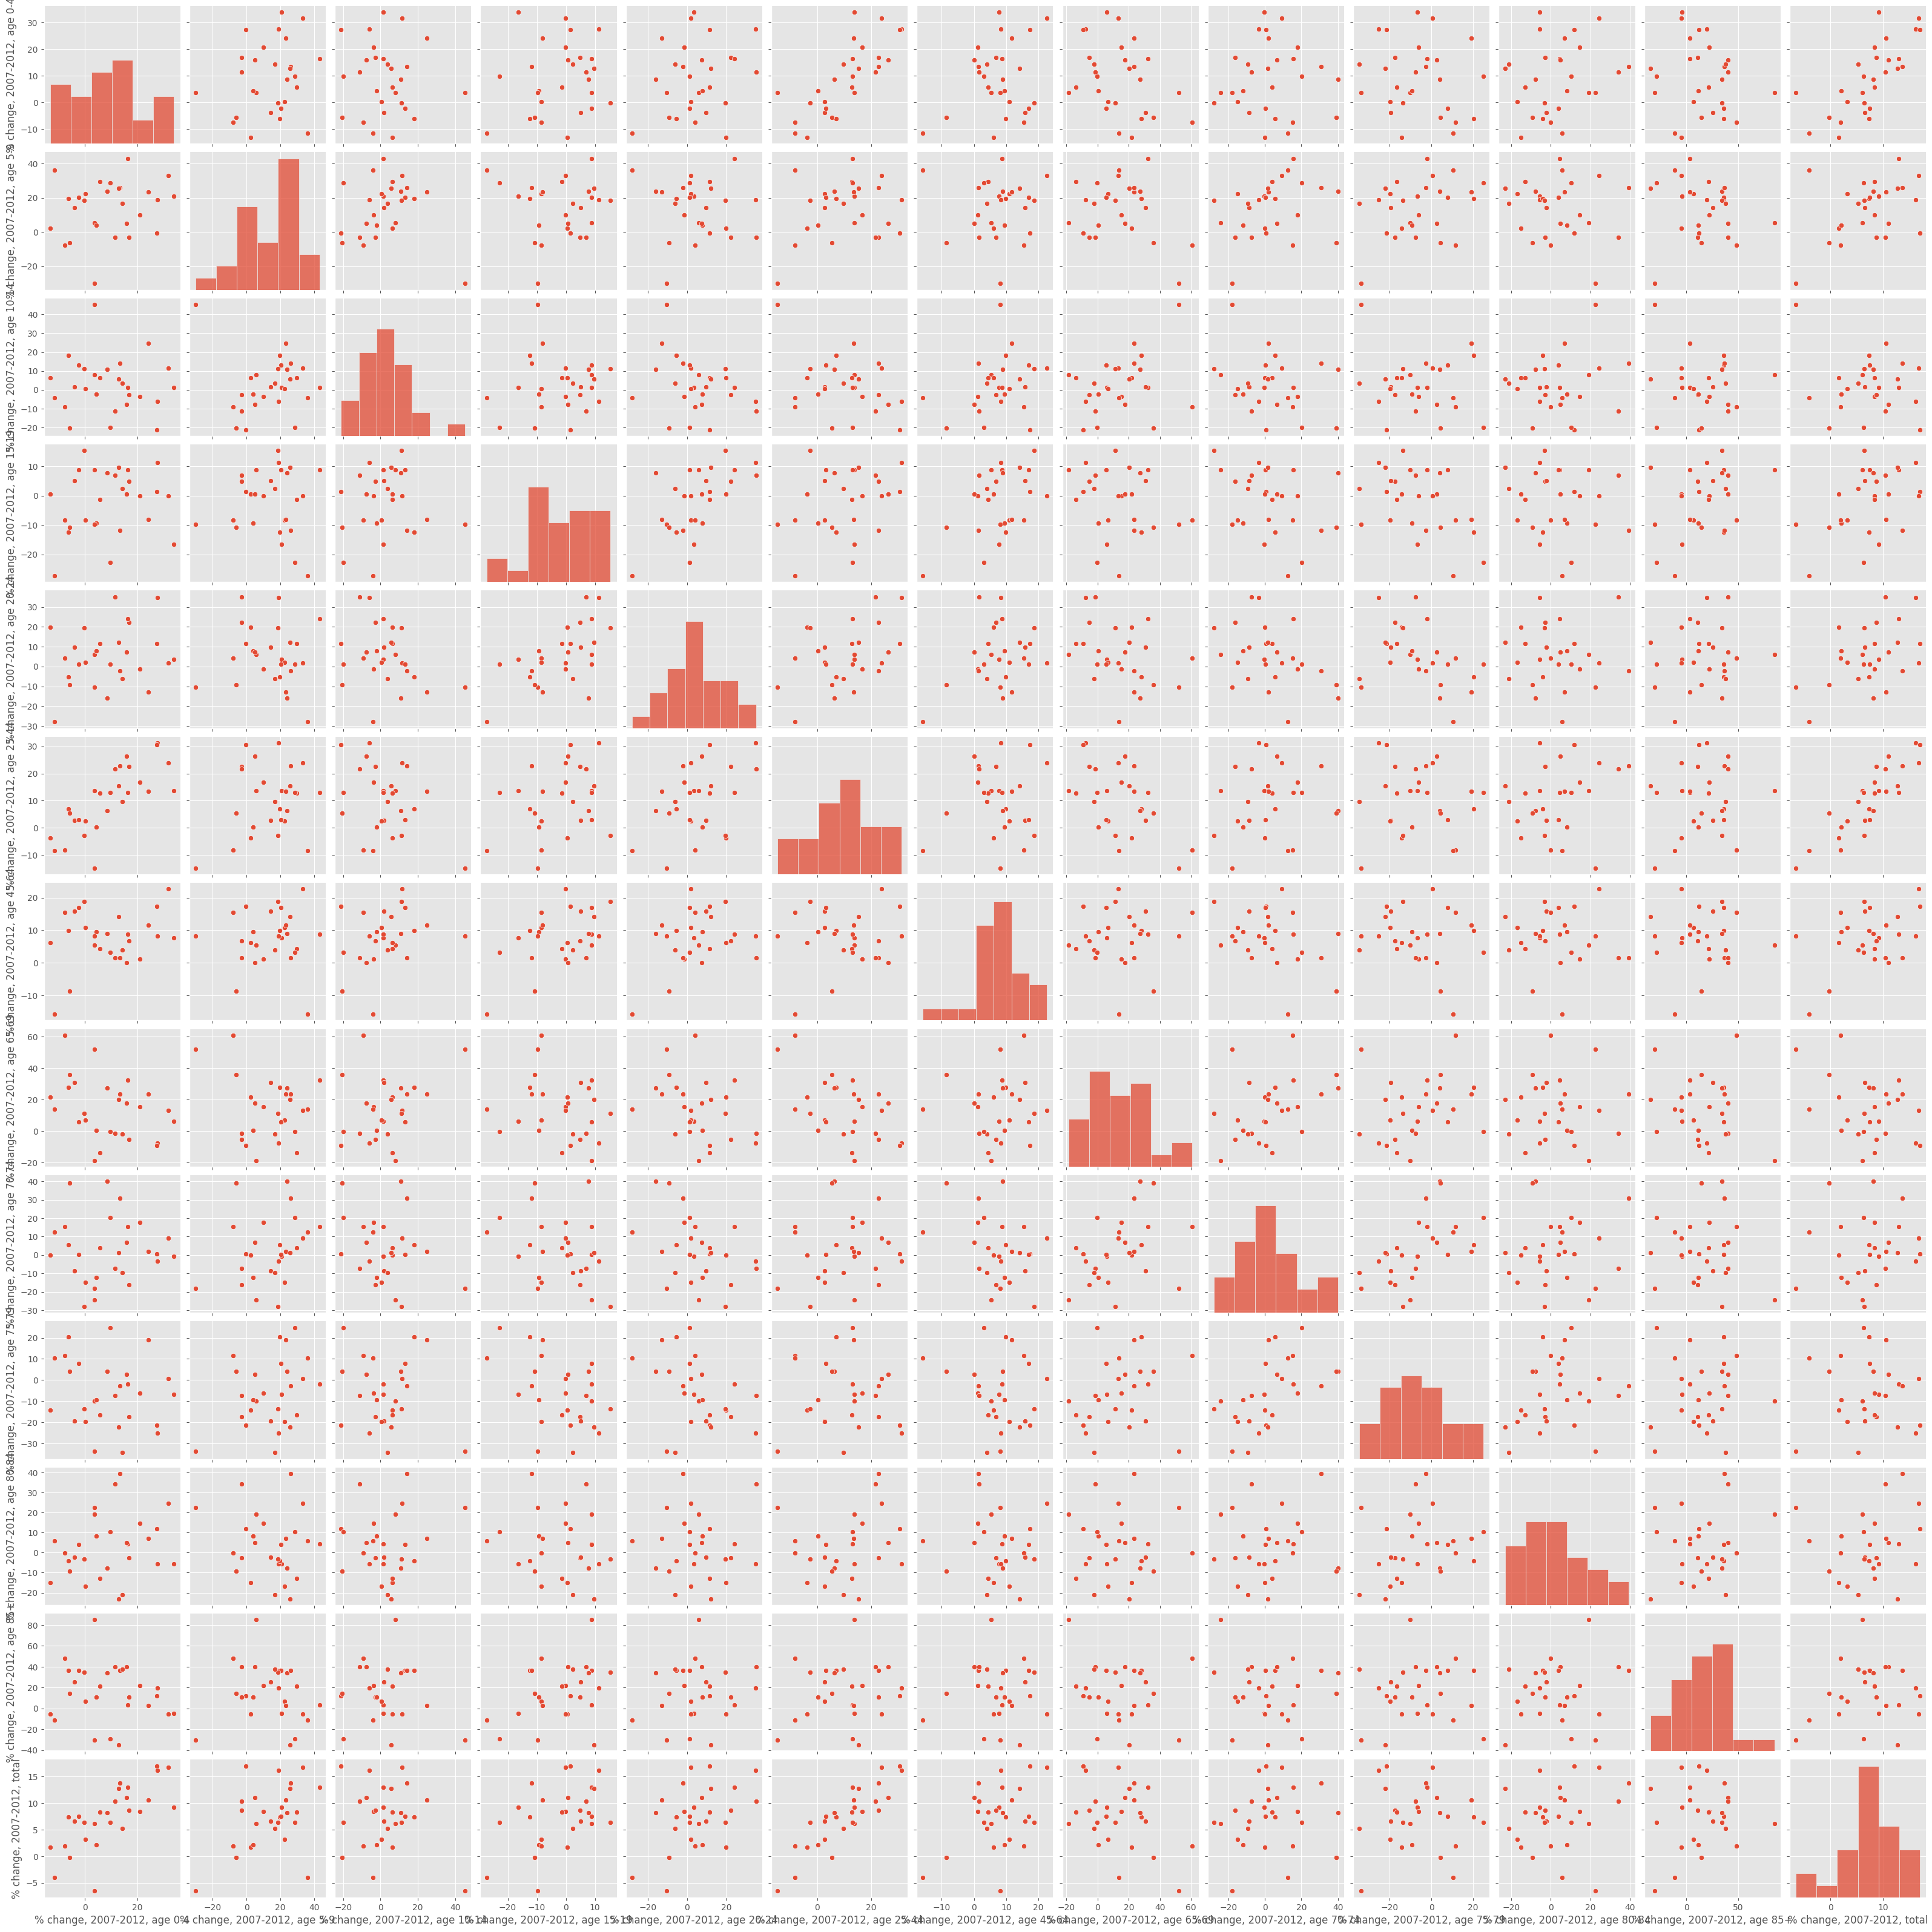

In [19]:
# plot the pairplot 
sns.pairplot(pop_data)
plt.show()


In [ ]:
# check the overall age